In [1]:
from solver import ipm_overleaf, ipm_chapter14
import gzip
import pickle

from scipy.optimize import linprog
import numpy as np
import time

In [2]:
sp_var = []
rel_err = []
abs_err = []

scp_obj = []
abs_obj_err = []
rel_obj_err = []

In [3]:
for i in range(100):
    with gzip.open(f"instances/setcover/instance_{i}.pkl.gz", "rb") as file:
        (A, b, c) = pickle.load(file)

    c = c.numpy()
    A_ub = None
    b_ub = None
    A_eq = A.numpy()
    b_eq = b.numpy()
    bounds = None
    
    t1 = time.time()
    sol = ipm_overleaf(c, A_ub, b_ub, A_eq, b_eq, bounds, max_iter = 1000, tol = 1.e-9)
    t2 = time.time()
    
    sol_cp = linprog(c, 
                    A_ub=A_ub, 
                    b_ub=b_ub, 
                    A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='interior-point')
    
    t3 = time.time()
    
    print(f'{i}th problem - time: ours {t2 - t1}, scipy {t3 - t2}, var gap {np.abs(sol["x"] - sol_cp.x).max()} '
          f'steps: ours {sol["nit"]} scipy {sol_cp.nit}')
    sp_var.append(sol_cp.x)
    abs_err.append(np.abs(sol["x"] - sol_cp.x))
    rel_err.append(np.abs(sol["x"] - sol_cp.x) / (sol_cp.x + 1.e-7))
    scp_obj.append(sol_cp.fun)
    abs_obj_err.append(np.abs(sol_cp.fun - sol['fun']))
    rel_obj_err.append(np.abs(sol_cp.fun - sol['fun']) / sol_cp.fun)

/var/folders/6v/m172f7bs02l0tkwy4_9yxttm0000gn/T/ipykernel_72635/2590898127.py:16: DeprecationWarning: `method='interior-point'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  sol_cp = linprog(c,


0th problem - time: ours 18.373507022857666, scipy 8.302070140838623, var gap 1.703193380775403e-08 steps: ours 38 scipy 16
1th problem - time: ours 17.836644172668457, scipy 7.319432973861694, var gap 0.011334020445814552 steps: ours 40 scipy 15
2th problem - time: ours 18.069686889648438, scipy 7.699887275695801, var gap 0.003191452900166425 steps: ours 39 scipy 14
3th problem - time: ours 18.333804845809937, scipy 8.515838861465454, var gap 1.2959748940666316e-08 steps: ours 42 scipy 16


/var/folders/6v/m172f7bs02l0tkwy4_9yxttm0000gn/T/ipykernel_72635/2590898127.py:16: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  sol_cp = linprog(c,
/var/folders/6v/m172f7bs02l0tkwy4_9yxttm0000gn/T/ipykernel_72635/2590898127.py:16: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  sol_cp = linprog(c,
/Users/qianchendi/miniconda3/envs/ipmgnn/lib/python3.10/site-packages/scipy/optimize/_linprog_ip.py:120: LinAlgWarning: Ill-conditioned matrix (rcond=1.77625e-24): result may not be accurate.
  return sp.linalg.solve(M, r)


4th problem - time: ours 17.79867720603943, scipy 9.535592794418335, var gap 1.3177195778979467e-08 steps: ours 39 scipy 16
5th problem - time: ours 17.69921898841858, scipy 8.26560378074646, var gap 0.0017385685705928466 steps: ours 39 scipy 16
6th problem - time: ours 20.311471223831177, scipy 8.738675832748413, var gap 2.7034824268135083e-08 steps: ours 41 scipy 17
7th problem - time: ours 22.59146022796631, scipy 9.309544801712036, var gap 1.642343805396962e-08 steps: ours 45 scipy 18
8th problem - time: ours 17.53852081298828, scipy 8.073168277740479, var gap 0.0034638165148390687 steps: ours 40 scipy 15
9th problem - time: ours 18.028910160064697, scipy 7.997937202453613, var gap 3.3623407724725496e-08 steps: ours 41 scipy 15
10th problem - time: ours 16.82349991798401, scipy 6.137181997299194, var gap 1.673617500141944e-08 steps: ours 38 scipy 12


/Users/qianchendi/miniconda3/envs/ipmgnn/lib/python3.10/site-packages/scipy/optimize/_linprog_ip.py:120: LinAlgWarning: Ill-conditioned matrix (rcond=1.27131e-20): result may not be accurate.
  return sp.linalg.solve(M, r)


11th problem - time: ours 15.978164196014404, scipy 9.39691710472107, var gap 0.0023654321224120256 steps: ours 39 scipy 16
12th problem - time: ours 17.99828314781189, scipy 7.378129959106445, var gap 0.01304760154007445 steps: ours 39 scipy 14
13th problem - time: ours 21.189828872680664, scipy 9.08545207977295, var gap 2.9638666632081367e-08 steps: ours 43 scipy 17
14th problem - time: ours 19.69650912284851, scipy 8.191715955734253, var gap 1.0499449865086774e-08 steps: ours 40 scipy 15
15th problem - time: ours 20.259572982788086, scipy 8.370115041732788, var gap 0.010976853041543944 steps: ours 43 scipy 17
16th problem - time: ours 18.642418146133423, scipy 8.035383939743042, var gap 1.1981444947295472e-08 steps: ours 40 scipy 16
17th problem - time: ours 18.763498306274414, scipy 8.217828750610352, var gap 0.012766300718342505 steps: ours 40 scipy 16
18th problem - time: ours 18.09655499458313, scipy 8.758731126785278, var gap 1.5362547067798715e-08 steps: ours 40 scipy 16
19th 

/Users/qianchendi/miniconda3/envs/ipmgnn/lib/python3.10/site-packages/scipy/optimize/_linprog_ip.py:120: LinAlgWarning: Ill-conditioned matrix (rcond=4.47531e-31): result may not be accurate.
  return sp.linalg.solve(M, r)
/Users/qianchendi/miniconda3/envs/ipmgnn/lib/python3.10/site-packages/scipy/optimize/_linprog_ip.py:120: LinAlgWarning: Ill-conditioned matrix (rcond=5.96607e-30): result may not be accurate.
  return sp.linalg.solve(M, r)
/Users/qianchendi/miniconda3/envs/ipmgnn/lib/python3.10/site-packages/scipy/optimize/_linprog_ip.py:120: LinAlgWarning: Ill-conditioned matrix (rcond=2.18624e-19): result may not be accurate.
  return sp.linalg.solve(M, r)


33th problem - time: ours 17.247035026550293, scipy 13.775853872299194, var gap 5.528053037551217e-08 steps: ours 40 scipy 19
34th problem - time: ours 18.768002033233643, scipy 9.057309865951538, var gap 1.5786734364198196e-08 steps: ours 40 scipy 17
35th problem - time: ours 18.7515709400177, scipy 8.521914005279541, var gap 0.0012105401041323516 steps: ours 40 scipy 16
36th problem - time: ours 19.43082022666931, scipy 8.774580001831055, var gap 3.262484753463468e-07 steps: ours 39 scipy 16
37th problem - time: ours 17.947094917297363, scipy 7.002527952194214, var gap 0.004674894162808196 steps: ours 43 scipy 15
38th problem - time: ours 18.652568101882935, scipy 8.599243640899658, var gap 3.980819718307771e-08 steps: ours 41 scipy 16
39th problem - time: ours 21.66134023666382, scipy 9.357836961746216, var gap 1.8328096862418874e-07 steps: ours 43 scipy 17
40th problem - time: ours 18.28262996673584, scipy 8.291038036346436, var gap 2.6316364198919473e-08 steps: ours 41 scipy 16
41

/Users/qianchendi/miniconda3/envs/ipmgnn/lib/python3.10/site-packages/scipy/optimize/_linprog_ip.py:120: LinAlgWarning: Ill-conditioned matrix (rcond=2.98024e-22): result may not be accurate.
  return sp.linalg.solve(M, r)


44th problem - time: ours 16.71012783050537, scipy 8.796892881393433, var gap 1.2207398647490209e-07 steps: ours 40 scipy 15
45th problem - time: ours 16.806669235229492, scipy 7.336872816085815, var gap 0.023280228302268835 steps: ours 39 scipy 14
46th problem - time: ours 16.8794949054718, scipy 7.444180965423584, var gap 0.000989189493653786 steps: ours 40 scipy 14
47th problem - time: ours 17.88652205467224, scipy 8.898436069488525, var gap 9.813985735185327e-09 steps: ours 40 scipy 17
48th problem - time: ours 19.72561001777649, scipy 8.727165222167969, var gap 0.00306441526459178 steps: ours 42 scipy 16
49th problem - time: ours 17.651943922042847, scipy 8.726242065429688, var gap 0.001296865068722397 steps: ours 40 scipy 16
50th problem - time: ours 17.630905151367188, scipy 8.429229021072388, var gap 0.00403162584123562 steps: ours 40 scipy 16
51th problem - time: ours 17.653192043304443, scipy 8.517011165618896, var gap 2.0803730627072525e-08 steps: ours 40 scipy 16
52th probl

/Users/qianchendi/miniconda3/envs/ipmgnn/lib/python3.10/site-packages/scipy/optimize/_linprog_ip.py:120: LinAlgWarning: Ill-conditioned matrix (rcond=3.49909e-19): result may not be accurate.
  return sp.linalg.solve(M, r)


88th problem - time: ours 20.04932689666748, scipy 10.366575002670288, var gap 0.00923028793432501 steps: ours 41 scipy 17
89th problem - time: ours 19.7432119846344, scipy 8.369812965393066, var gap 0.043525527913852446 steps: ours 43 scipy 16
90th problem - time: ours 18.15811014175415, scipy 8.039837121963501, var gap 0.003443386427730566 steps: ours 40 scipy 15
91th problem - time: ours 19.233052968978882, scipy 8.008477926254272, var gap 0.0013490633431487709 steps: ours 40 scipy 15
92th problem - time: ours 17.026915073394775, scipy 7.563537836074829, var gap 0.0030513755007307575 steps: ours 39 scipy 14
93th problem - time: ours 21.367825031280518, scipy 8.477200031280518, var gap 8.159767839188703e-08 steps: ours 43 scipy 16


/Users/qianchendi/miniconda3/envs/ipmgnn/lib/python3.10/site-packages/scipy/optimize/_linprog_ip.py:120: LinAlgWarning: Ill-conditioned matrix (rcond=1.48697e-22): result may not be accurate.
  return sp.linalg.solve(M, r)
/Users/qianchendi/miniconda3/envs/ipmgnn/lib/python3.10/site-packages/scipy/optimize/_linprog_ip.py:120: LinAlgWarning: Ill-conditioned matrix (rcond=1.17673e-20): result may not be accurate.
  return sp.linalg.solve(M, r)


94th problem - time: ours 19.490295886993408, scipy 12.062000036239624, var gap 1.7997961732074685e-08 steps: ours 42 scipy 17
95th problem - time: ours 18.607066869735718, scipy 7.881745338439941, var gap 1.2606546140325747e-08 steps: ours 40 scipy 15
96th problem - time: ours 20.372936010360718, scipy 7.515902042388916, var gap 0.0011338678319547935 steps: ours 42 scipy 14
97th problem - time: ours 20.83232593536377, scipy 8.260802030563354, var gap 2.970066526053472e-08 steps: ours 41 scipy 15


/Users/qianchendi/miniconda3/envs/ipmgnn/lib/python3.10/site-packages/scipy/optimize/_linprog_ip.py:120: LinAlgWarning: Ill-conditioned matrix (rcond=5.67149e-23): result may not be accurate.
  return sp.linalg.solve(M, r)
/Users/qianchendi/miniconda3/envs/ipmgnn/lib/python3.10/site-packages/scipy/optimize/_linprog_ip.py:120: LinAlgWarning: Ill-conditioned matrix (rcond=3.83867e-26): result may not be accurate.
  return sp.linalg.solve(M, r)


98th problem - time: ours 20.347979068756104, scipy 12.567154169082642, var gap 1.1789324738664675e-08 steps: ours 41 scipy 18
99th problem - time: ours 18.77114701271057, scipy 8.542155027389526, var gap 0.016929263952940588 steps: ours 40 scipy 16


In [4]:
sp_var = np.concatenate(sp_var, axis=0)
rel_err = np.concatenate(rel_err, axis=0)
abs_err = np.concatenate(abs_err, axis=0)

In [5]:
scp_obj = np.array(scp_obj)
abs_obj_err = np.array(abs_obj_err)
rel_obj_err = np.array(rel_obj_err)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

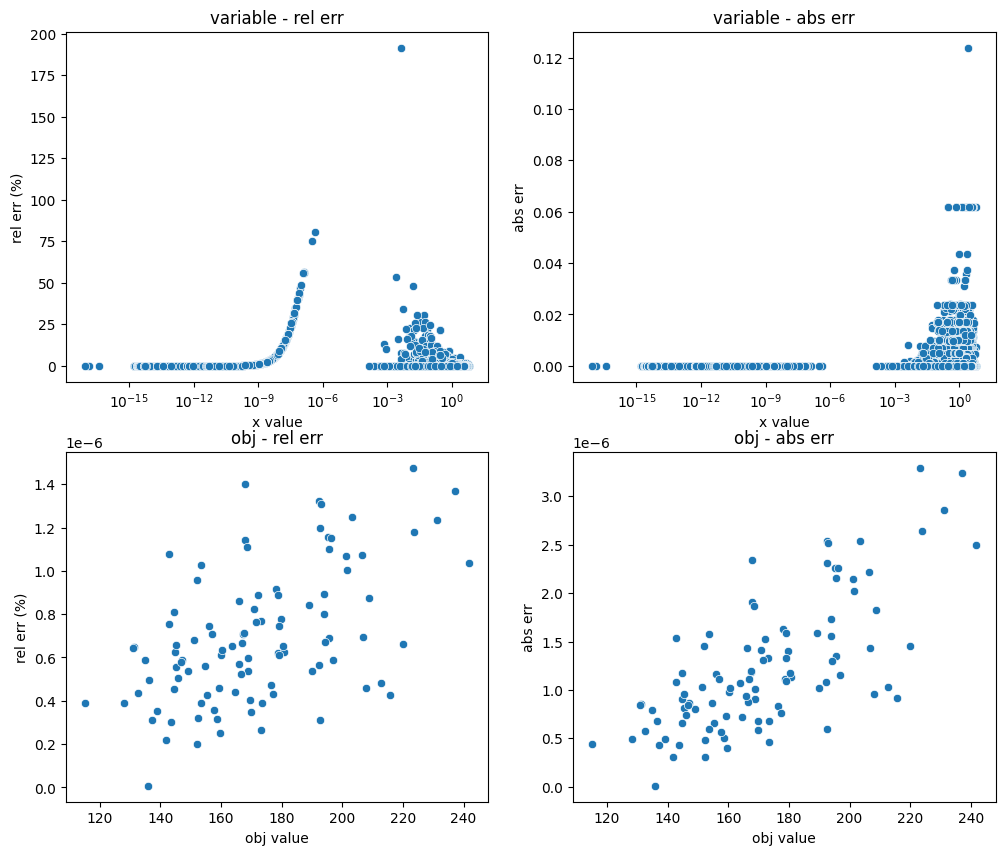

In [31]:
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(12, 10))
axes[0, 0].set_title('variable - rel err')
sns.scatterplot(x=sp_var, y=rel_err * 100, ax=axes[0, 0])
axes[0, 0].set_ylabel('rel err (%)')
axes[0, 0].set_xlabel('x value')
axes[0, 0].set_xscale('log')

axes[0, 1].set_title('variable - abs err')
sns.scatterplot(x=sp_var, y=abs_err, ax=axes[0, 1])
axes[0, 1].set_ylabel('abs err')
axes[0, 1].set_xlabel('x value')
axes[0, 1].set_xscale('log')

axes[1, 0].set_title('obj - rel err')
sns.scatterplot(x=scp_obj, y=rel_obj_err * 100, ax=axes[1, 0])
axes[1, 0].set_ylabel('rel err (%)')
axes[1, 0].set_xlabel('obj value')

axes[1, 1].set_title('obj - abs err')
sns.scatterplot(x=scp_obj, y=abs_obj_err, ax=axes[1, 1])
axes[1, 1].set_ylabel('abs err')
axes[1, 1].set_xlabel('obj value')

plt.savefig('subplot.png')